In [2]:
import geopandas as gpd
from shapely import wkt
import pandas as pd
import base64
from shapely import wkb
import os
import leafmap.leafmap as leafmap
from rasterstats import zonal_stats
import rasterio
from shapely.geometry import Point
from rasterstats import point_query
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import requests
from collections import Counter
from shapely.geometry import MultiPolygon, Polygon
import time
import phik
from sklearn.preprocessing import PowerTransformer
from sklearn import set_config

pd.options.display.max_columns = None
set_config(transform_output='pandas')

#sklearn.set_config(transform_output='pandas')



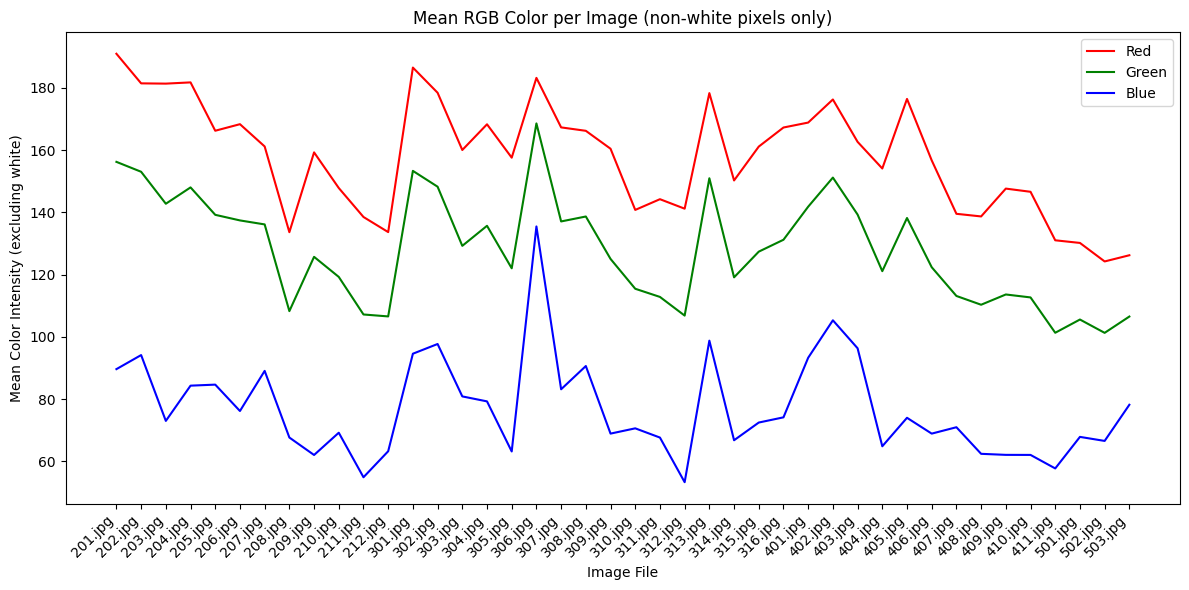

In [ ]:
image_dir = 'data/photos'

image_means = {}

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        filepath = os.path.join(image_dir, filename)
        image = cv2.imread(filepath)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        mask = np.all(image_rgb != [255, 255, 255], axis=-1)

        if np.any(mask): 
            mean_color = image_rgb[mask].mean(axis=0)
        else:
            mean_color = [0, 0, 0]

        image_means[filename] = mean_color

# Visualization
filenames = list(image_means.keys())
means = np.array(list(image_means.values()))
reds, greens, blues = means[:, 0], means[:, 1], means[:, 2]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filenames, reds, 'r-', label='Red')
plt.plot(filenames, greens, 'g-', label='Green')
plt.plot(filenames, blues, 'b-', label='Blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Image File')
plt.ylabel('Mean Color Intensity (excluding white)')
plt.title('Mean RGB Color per Image (non-white pixels only)')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
ph_310 =cv2.cvtColor(cv2.imread('data/photos/310.jpg'), cv2.COLOR_BGR2RGB)
ph_310

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [25]:
mask = np.all(ph_310 != [255, 255, 255], axis=-1)
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(100, 100))

In [27]:
ph_310[mask]

array([[254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       ...,
       [254, 254, 252],
       [254, 254, 254],
       [254, 254, 252]], shape=(2908, 3), dtype=uint8)

In [20]:
phot = cv2.cvtColor(cv2.imread("data/photos/distr2.jpg"), cv2.COLOR_BGR2RGB)
phot

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [21]:
mask = np.all(phot != [255, 255, 255], axis=-1)
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(693, 1041))

In [22]:
phot[mask]

array([[253, 251, 254],
       [247, 253, 251],
       [251, 253, 250],
       ...,
       [250, 249, 244],
       [251, 251, 249],
       [250, 250, 250]], shape=(1768, 3), dtype=uint8)

In [10]:
phot[mask].mean(axis=0)

array([178.16346154, 167.69852941, 133.69457014])

In [3]:
m = leafmap.Map(center=(40, -100), zoom=4)
small_sat = f"data/BlackMarble_2016_3km_geo.tif"
m.add_raster(small_sat, layer_name="Black Marble Small")
m.add_layer_control()
m

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [28]:
df = pd.read_csv("data/crimesUsa.csv")
df

,ID,Date,PD_CD,Description,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,age,...,FBI Code,Year,Updated On,Location,City,crime_code,year,Month,day,datetime
0,109557691,2014-04-14T00:00:00.000000,848,OTHER STATE LAWS (NON PENAL LAW),LOC00000UM,M,M,22,0,25-44,...,NaN,0.0,NaN,NaN,NYC,364.0,2014.0,April,14.0,2014-04-14T00:00:00.000000
1,109557692,2014-04-14T00:00:00.000000,849,OTHER STATE LAWS,LOC000000V,V,Q,110,0,25-44,...,NaN,0.0,NaN,NaN,NYC,677.0,2014.0,April,14.0,2014-04-14T00:00:00.000000
2,109557693,2014-04-13T00:00:00.000000,922,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,40,0,25-44,...,NaN,0.0,NaN,NaN,NYC,348.0,2014.0,April,13.0,2014-04-13T00:00:00.000000
3,109557694,2014-04-14T00:00:00.000000,922,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,43,0,25-44,...,NaN,0.0,NaN,NaN,NYC,348.0,2014.0,April,14.0,2014-04-14T00:00:00.000000
4,109557695,2014-04-14T00:00:00.000000,922,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,Q,110,0,25-44,...,NaN,0.0,NaN,NaN,NYC,348.0,2014.0,April,14.0,2014-04-14T00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981700,6862380,2009-04-10T20:15:00.000000,0,ILLEGAL CONSUMPTION BY MINOR,NaN,NaN,NaN,0,0,NaN,...,22,2009.0,02/28/2018 03:56:25 PM,"(41.885312381, -87.667573631)",Chicago,2230,2009.0,April,10.0,2009-04-10T20:15:00.000000
2981701,6862381,2009-04-14T09:00:00.000000,0,RETAIL THEFT,NaN,NaN,NaN,0,0,NaN,...,06,2009.0,02/28/2018 03:56:25 PM,"(41.857190995, -87.661735179)",Chicago,0860,2009.0,April,14.0,2009-04-14T09:00:00.000000
2981702,6862382,2009-04-13T21:30:00.000000,0,ARMED: HANDGUN,NaN,NaN,NaN,0,0,NaN,...,03,2009.0,02/28/2018 03:56:25 PM,"(41.732298214, -87.658395911)",Chicago,031A,2009.0,April,13.0,2009-04-13T21:30:00.000000
2981703,6862384,2009-04-14T13:27:00.000000,0,TO STATE SUP LAND,NaN,NaN,NaN,0,0,NaN,...,26,2009.0,02/10/2018 03:50:01 PM,"(41.756321504, -87.579756798)",Chicago,1350,2009.0,April,14.0,2009-04-14T13:27:00.000000


In [31]:
df['Lon_Lat']

0          POINT (-73.96587826899997 40.78245186000004)
1          POINT (-73.86537333399998 40.74960053300003)
2          POINT (-73.90907618199996 40.81324161600002)
3          POINT (-73.87550694899994 40.82924217100003)
4          POINT (-73.86525182699995 40.74722069000006)
                               ...                     
2981700                                             NaN
2981701                                             NaN
2981702                                             NaN
2981703                                             NaN
2981704                                             NaN
Name: Lon_Lat, Length: 2981705, dtype: object

In [ ]:
df['geometry'] = df['Lon_Lat'].apply(loads)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

In [2]:
distr_chicago = pd.read_csv("data/ChicagoDistricts.csv")
distr_chicago

,the_geom,DIST_LABEL,DIST_NUM
0,MULTIPOLYGON (((-87.71067089391354 41.99736565...,17TH,17
1,MULTIPOLYGON (((-87.66029423572358 41.99091633...,20TH,20
2,MULTIPOLYGON (((-87.82817787271652 41.98384222...,31ST,31
3,MULTIPOLYGON (((-87.83365455160555 41.97535481...,31ST,31
4,MULTIPOLYGON (((-87.64491798568677 41.96972709...,19TH,19
5,MULTIPOLYGON (((-87.71739917372257 41.93921621...,25TH,25
6,MULTIPOLYGON (((-87.69256666010364 41.93942656...,14TH,14
7,MULTIPOLYGON (((-87.69123096883077 41.69898580...,31ST,31
8,MULTIPOLYGON (((-87.63631615604635 41.73617688...,22ND,22
9,MULTIPOLYGON (((-87.58775992207175 41.72230545...,5TH,5


In [2]:
nyc_df = pd.read_csv("data/NYPD_Arrests_Data.csv")
nyc_df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,205590989,11/24/2019,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,28,0,25-44,F,WHITE,997571.0,234556.0,40.810476,-73.951880,POINT (-73.95188015099995 40.81047604300005)
1,202546976,09/17/2019,793.0,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,M,6,0,45-64,M,BLACK,982746.0,206647.0,40.733883,-74.005428,POINT (-74.00542831099995 40.73388303300004)
2,203563701,10/10/2019,494.0,"STOLEN PROPERTY 2,1,POSSESSION",111.0,POSSESSION OF STOLEN PROPERTY,PL 1654502,F,K,90,0,18-24,M,BLACK HISPANIC,1000830.0,197889.0,40.709829,-73.940198,POINT (-73.94019763899996 40.70982902900005)
3,205169609,11/14/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,B,43,0,18-24,M,BLACK HISPANIC,1020183.0,239283.0,40.823387,-73.870170,POINT (-73.87017044999999 40.823387291000074)
4,204097687,10/23/2019,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211300,F,Q,114,0,25-44,M,BLACK,1007694.0,219657.0,40.769561,-73.915363,POINT (-73.91536344699995 40.769561242000066)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63952,210237326,02/28/2020,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100B,M,M,6,0,18-24,M,BLACK,982531.0,204757.0,40.728695,-74.006204,POINT (-74.00620360899995 40.728695406000035)
63953,212445355,04/28/2020,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,72,0,25-44,M,WHITE HISPANIC,980334.0,174808.0,40.646492,-74.014113,POINT (-74.01411298599999 40.646491562000044)
63954,213592090,05/27/2020,705.0,"FORGERY,ETC.-MISD.",358.0,OFFENSES INVOLVING FRAUD,PL 1700500,M,B,46,0,18-24,M,BLACK,1009694.0,249366.0,40.851099,-73.908030,POINT (-73.90803040599997 40.85109863400004)
63955,212830424,05/08/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,M,10,0,18-24,M,BLACK,984686.0,209908.0,40.742834,-73.998428,POINT (-73.99842802399996 40.74283378800004)


In [3]:
nyc_dist = pd.read_csv("data/nyc_districts.csv")
nyc_dist

,geometry,OBJECTID,BoroCD
0,"POLYGON ((-73.970827461413 40.6816241927723, -...",1,308
1,"POLYGON ((-73.8011567664047 40.6718073763563, ...",2,410
2,"POLYGON ((-73.8811950855142 40.8616921207503, ...",3,206
3,"POLYGON ((-73.8678854841455 40.7873693125354, ...",4,480
4,"POLYGON ((-73.984987268871 40.7693289694358, -...",5,104
...,...,...,...
66,MULTIPOLYGON (((-74.1017387967513 40.559913800...,67,502
67,"POLYGON ((-73.9450805194399 40.6557302938809, ...",68,309
68,"POLYGON ((-73.9688824752595 40.6729886034362, ...",69,355
69,MULTIPOLYGON (((-74.0438790756632 40.690195926...,70,101


In [4]:
geo_dist_nyc = gpd.GeoDataFrame(nyc_dist, geometry=nyc_dist['geometry'].apply(wkt.loads) )

In [5]:
geo_dist_nyc.set_crs(epsg=4326, inplace=True)
geo_dist_nyc

,geometry,OBJECTID,BoroCD
0,"POLYGON ((-73.97083 40.68162, -73.96768 40.680...",1,308
1,"POLYGON ((-73.80116 40.67181, -73.80114 40.671...",2,410
2,"POLYGON ((-73.8812 40.86169, -73.88056 40.8612...",3,206
3,"POLYGON ((-73.86789 40.78737, -73.86803 40.787...",4,480
4,"POLYGON ((-73.98499 40.76933, -73.98477 40.769...",5,104
...,...,...,...
66,"MULTIPOLYGON (((-74.10174 40.55991, -74.10237 ...",67,502
67,"POLYGON ((-73.94508 40.65573, -73.94716 40.655...",68,309
68,"POLYGON ((-73.96888 40.67299, -73.96894 40.672...",69,355
69,"MULTIPOLYGON (((-74.04388 40.6902, -74.04351 4...",70,101


In [6]:
def query_osm_amenities(polygon):
    if isinstance(polygon, MultiPolygon):
        coords = []
        for poly in polygon.geoms:
            coords += [f"{lat} {lon}" for lon, lat in poly.exterior.coords]
    elif isinstance(polygon, Polygon):
        coords = [f"{lat} {lon}" for lon, lat in polygon.exterior.coords]
    else:
        raise ValueError("Unknown geometry type")
    
    poly_str = " ".join(coords)

    query = f"""
    [out:json][timeout:25];
    (
      node["amenity"](poly:"{poly_str}");
      way["amenity"](poly:"{poly_str}");
      relation["amenity"](poly:"{poly_str}");
    );
    out center;
    """
    url = "http://overpass-api.de/api/interpreter"
    response = requests.post(url, data={"data": query})

    if response.status_code != 200:
        raise Exception(f"Bad response status {response.status_code}")
    if not response.content or not response.content.strip():
        raise Exception("Empty response body")

    return response.json()


In [7]:
from collections import Counter

def extract_amenities(osm_data):
    counts = Counter()
    for el in osm_data.get("elements", []):
        tags = el.get("tags", {})
        if "amenity" in tags:
            counts[tags["amenity"]] += 1
    return dict(counts)


In [8]:
amenity_data = []

for i, row in geo_dist_nyc.iterrows():
    polygon = row['geometry']
    try:
        osm = query_osm_amenities(polygon)
        counts = extract_amenities(osm)
        amenity_data.append(counts)
    except Exception as e:
        print(f"Error at polygon {i}: {e}")
        amenity_data.append({})
    time.sleep(1)


In [9]:
amenity_df = pd.DataFrame(amenity_data).fillna(0)
result = pd.concat([geo_dist_nyc.reset_index(drop=True), amenity_df], axis=1)

In [10]:
for col in result.columns:
    print(f"{col} ----> {(result[col] == 0.0).sum()}")


geometry ----> 0
OBJECTID ----> 0
BoroCD ----> 0
school ----> 8
place_of_worship ----> 8
fire_station ----> 10
fast_food ----> 3
bicycle_parking ----> 0
bench ----> 2
post_box ----> 10
bar ----> 14
restaurant ----> 3
toilets ----> 3
events_venue ----> 29
cafe ----> 10
atm ----> 23
driving_school ----> 41
bicycle_rental ----> 32
kindergarten ----> 30
pharmacy ----> 11
parking ----> 0
childcare ----> 26
taxi ----> 44
money_transfer ----> 33
dojo ----> 30
dentist ----> 18
pub ----> 30
ice_cream ----> 22
veterinary ----> 34
social_facility ----> 14
bank ----> 13
coworking_space ----> 62
drinking_water ----> 1
doctors ----> 19
animal_boarding ----> 52
telephone ----> 48
post_office ----> 11
cinema ----> 39
fuel ----> 11
public_bookcase ----> 43
clinic ----> 13
vending_machine ----> 22
studio ----> 50
arts_centre ----> 41
recycling ----> 26
music_school ----> 47
parking_entrance ----> 15
waste_basket ----> 8
clock ----> 40
car_rental ----> 38
police ----> 9
car_wash ----> 35
shelter ----> 10

In [11]:
df = result.copy()

In [ ]:
def powerTransform(df, target_col, threshold=0.85, method='yeo-johnson'):
    target = df[target_col]
    X = df.drop(columns=[target_col])
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    cor_data = X.phik_matrix(interval_cols= numeric_cols)
    cor_data.loc[numeric_cols, numeric_cols] = np.sign(df.corr(method='spearman')) * cor_data.loc[numeric_cols, numeric_cols]
    powertr = PowerTransformer(method=method)
    X_transformed = pd.DataFrame(powertr.fit_transform(X[numeric_cols]))

    X_transformed[target_col] = target

    to_drop_after = set()


    
    return filtered

In [18]:
type(df[target_col])

pandas.core.series.Series

In [17]:
type(df[[target_col]])

pandas.core.frame.DataFrame

In [12]:
target_col = 'BoroCD'
for i in df[[target_col]].iterrows():
    row_index = i[0]
    row = i[1]
    print(f"row[target_col]: {row[target_col]}")


row[target_col]: 308
row[target_col]: 410
row[target_col]: 206
row[target_col]: 480
row[target_col]: 104
row[target_col]: 107
row[target_col]: 503
row[target_col]: 595
row[target_col]: 207
row[target_col]: 317
row[target_col]: 481
row[target_col]: 227
row[target_col]: 409
row[target_col]: 316
row[target_col]: 413
row[target_col]: 483
row[target_col]: 208
row[target_col]: 226
row[target_col]: 312
row[target_col]: 314
row[target_col]: 315
row[target_col]: 313
row[target_col]: 401
row[target_col]: 102
row[target_col]: 402
row[target_col]: 356
row[target_col]: 406
row[target_col]: 482
row[target_col]: 201
row[target_col]: 202
row[target_col]: 310
row[target_col]: 311
row[target_col]: 205
row[target_col]: 405
row[target_col]: 304
row[target_col]: 210
row[target_col]: 414
row[target_col]: 484
row[target_col]: 408
row[target_col]: 412
row[target_col]: 305
row[target_col]: 318
row[target_col]: 403
row[target_col]: 404
row[target_col]: 105
row[target_col]: 103
row[target_col]: 407
row[target_co

In [ ]:
def powerTransform(df, target_col, thr_tar, thr_nontar):
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    powertr = PowerTransformer()
    df[numeric_cols] = powertr.fit_transform(df[numeric_cols])

    cor_data = df.phik_matrix(interval_cols=numeric_cols)


        










In [ ]:
def check_target_correlation(target_col, thr_tar):
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    powertr = PowerTransformer()
    df[numeric_cols] = powertr.fit_transform(df[numeric_cols])

    cor_data = df.phik_matrix(interval_cols=numeric_cols)

    target_corr = cor_data[target_col]
    target_corr = target_corr[target_corr.index != target_col]

    meets_treshold = target_corr[target_corr >= thr_tar].to_dict()
    below_threshold = target_corr[target_corr < thr_tar].index.tolist()

    return meets_treshold, below_threshold

check_target_correlation(target_col='BoroCD', thr_tar = 0.3)


({'geometry': 1.0,
  'OBJECTID': 0.2526202136118815,
  'school': 0.37783532146062604,
  'place_of_worship': 0.4849619513107004,
  'fire_station': 0.57560469773183,
  'fast_food': 0.3864201597803153,
  'bicycle_parking': 0.6425882455249874,
  'bench': 0.42918107932189303,
  'post_box': 0.5082047186404873,
  'bar': 0.4000663998960834,
  'restaurant': 0.589648969857741,
  'toilets': 0.36435270197413905,
  'events_venue': 0.5330968663509761,
  'cafe': 0.5007068289254164,
  'atm': 0.24501939814557003,
  'driving_school': 0.44631786123663864,
  'bicycle_rental': 0.22426712745700866,
  'kindergarten': 0.4390277630185475,
  'pharmacy': 0.5062601515376668,
  'parking': 0.6750638219741626,
  'childcare': 0.4730716104222564,
  'taxi': 0.3559480308169755,
  'dojo': 0.5900046418416793,
  'dentist': 0.2984323015108697,
  'pub': 0.43109280546493295,
  'ice_cream': 0.4549492513401587,
  'veterinary': 0.2874340931862685,
  'social_facility': 0.6386507473132484,
  'bank': 0.6947347351118762,
  'coworkin

In [14]:
thr_tar = 0.2

numeric_cols = df.select_dtypes(include=[np.number]).columns

powertr = PowerTransformer()
df[numeric_cols] = powertr.fit_transform(df[numeric_cols])

cor_data = df.phik_matrix(interval_cols=numeric_cols)




for i in cor_data[[target_col]].iterrows():
    tr = i[1]
    print(tr[target_col])


1.0
0.2404709095541837
1.0
0.4245917338968157
0.4849619513107004
0.57560469773183
0.3864201597803153
0.6425882455249874
0.42918107932189303
0.506945154746106
0.42969619538888676
0.5930139569455456
0.36435270197413905
0.5330968663509761
0.5007068289254164
0.19751773858959976
0.7464262260740173
0.0
0.47853446453101806
0.4852860582793894
0.6750638219741626
0.4730716104222564
0.41759319487832863
0.0
0.5900046418416793
0.2984323015108697
0.4394911206183929
0.4549492513401587
0.35155025137514284
0.6386507473132484
0.6199811597061266
0.23316525500939747
0.6038254339661713
0.5928188437871843
0.3842501276333452
0.44204722236104
0.7339706313626965
0.342261653553064
0.5757550964457311
0.33209885804058464
0.33790064520833624
0.4040903724219219
0.25677813632463437
0.49629832083056813
0.5335161326341267
0.4959133088998722
0.34990253313671615
0.4618449451260289
0.5807892860012499
0.19715470395841034
0.4997756478233443
0.6689986971000441
0.6415347319801047
0.7358684396544359
0.0
0.1938745711222857
0.1

In [32]:
filtered_data = powerTransform(result, target_col='BoroCD', threshold=0.85)


ValueError: Boolean array expected for the condition, not int64

In [24]:
print("before filter:", result.shape)
print("after filter:", filtered_data.shape)


before filter: (71, 192)
after filter: (71, 154)


In [25]:
removed_cols = set(result.columns) - set(filtered_data.columns)
print("Deleted items:", len(removed_cols))
print(removed_cols)


Deleted items: 38
{'dentist', 'butcher', 'laundry', 'massage_chair', 'health_post', 'stock_exchange', 'pharmacy', 'planetarium', 'exhibition_centre', 'ice_cream', 'workshop', 'printer', 'barbershop', 'post_box', 'office', 'cafe;bar', 'bus_depot', 'bar', 'fast_food', 'mist_spraying_cooler', 'karaoke', 'shoe', 'bank', 'geometry', 'barber', 'towing_service', 'beauty', 'School Supply Store', 'graphic_design', 'supermarket', 'bakery', 'clinic', 'slaughterhouse', 'convenience', 'first_aid_school', 'dog_toilet', 'restaurant', 'stroller_rental'}


In [22]:
filtered_data.head()


,OBJECTID,school,place_of_worship,fire_station,bicycle_parking,bench,toilets,events_venue,cafe,atm,...,tutoring,public_bath,acting_school,animal_training,funeral_hall,candy,hand_sanitizing,nail_salon,dog_parking,BoroCD
0,-1.994001,0.008635,0.693141,-0.237181,0.967409,-0.915851,-0.459143,1.428986,0.867082,0.467952,...,-0.119523,-0.244339,-0.119523,-0.170251,-0.170251,-0.119523,-0.119523,-0.119523,-0.119523,308
1,-1.896629,-0.240578,-0.434481,0.971197,-0.123904,0.015374,-1.165432,0.018819,-0.476767,-0.290900,...,-0.119523,-0.244339,-0.119523,-0.170251,-0.170251,-0.119523,-0.119523,-0.119523,-0.119523,410
2,-1.807934,0.008635,-0.561345,0.108615,-0.441745,-1.389505,0.165138,-1.073810,-0.476767,-1.211569,...,-0.119523,-0.244339,-0.119523,-0.170251,-0.170251,-0.119523,-0.119523,-0.119523,-0.119523,206
3,-1.725180,-1.819365,-1.802042,-1.719956,-1.686917,-1.975906,1.262848,-1.073810,-0.593153,1.270388,...,-0.119523,-0.244339,-0.119523,-0.170251,-0.170251,-0.119523,-0.119523,-0.119523,-0.119523,480
4,-1.646872,0.365540,-0.237632,-0.237181,1.419584,0.673197,0.831574,1.326878,1.355258,1.649498,...,-0.119523,-0.244339,-0.119523,-0.170251,-0.170251,-0.119523,-0.119523,-0.119523,-0.119523,104


In [26]:
filtered_data.to_csv("data/filtered_data.csv")

In [90]:
target = result['BoroCD']
ds = result.drop(columns=['geometry', 'OBJECTID'])

In [ ]:
num_data = ds.select_dtypes(include=[np.number]).columns
cor_data = ds.phik_matrix(interval_cols= num_data)
cor_data.loc[num_data, num_data ] = np.sign(num_data.corr(method='spearman')) * cor_data.loc[num_data, num_data]
cor_data


,BoroCD,school,place_of_worship,fire_station,fast_food,bicycle_parking,bench,post_box,bar,restaurant,toilets,events_venue,cafe,atm,driving_school,bicycle_rental,kindergarten,pharmacy,parking,childcare,taxi,money_transfer,dojo,dentist,pub,ice_cream,veterinary,social_facility,bank,coworking_space,drinking_water,doctors,animal_boarding,telephone,post_office,cinema,fuel,public_bookcase,clinic,vending_machine,studio,arts_centre,recycling,music_school,parking_entrance,waste_basket,clock,car_rental,police,car_wash,shelter,prep_school,casino,nightclub,loading_dock,hookah_lounge,fountain,library,grave_yard,shower,mailroom,parking_space,university,marketplace,hospital,food_court,charging_station,dog_toilet,lounge,prison,theatre,urgent_care,community_centre,language_school,bus_station,boat_rental,fortune_teller,ferry_terminal,stripclub,social_centre,bicycle_repair_station,convenience,post_depot,waste_transfer_station,exhibition_centre,college,dormitory,animal_shelter,planetarium,waste_disposal,wifi;telephone;device_charging_station,table,dancing_school,payment_centre,trolley_bay,letter_box,weighbridge,vehicle_inspection,library_dropoff,ranger_station,lounger,lost_property_office,health_post,parcel_locker,townhall,courthouse,surface,nursing_home,taxi_point,bureau_de_change,device_charging_station,motorcycle_parking,relay_box,dog,store,monastery,laundry,dog_groomer,barbershop,beauty,bakery,shoe,office,barber,butcher,supermarket,stage,biergarten,karaoke_box,car_sharing,disused,bbq,music_venue,swingerclub,training,School Supply Store,public_building,warehouse,refugee_site,photo_booth,crematorium,beauty_school,hairdresser,internet_cafe,spa,food_sharing,give_box,binoculars,first_aid,polling_station,payment_terminal,conference_centre,mortuary,bus_depot,compressed_air,social_club,fixme,graphic_design,cafe;bar,postal_relay_box,printer,karaoke,gambling,driver_training,workshop,dressing_room,security_booth,research_institute,clear,radio station,watering_place,meditation_centre,concert_hall,smoking_area,tutoring,first_aid_school,public_bath,acting_school,animal_training,slaughterhouse,funeral_hall,candy,hand_sanitizing,massage_chair,stroller_rental,nail_salon,stock_exchange,dog_parking,mist_spraying_cooler
BoroCD,1.000000,-0.335152,0.513616,0.593787,-0.162451,-0.313631,-0.383844,-0.509339,-0.000000,-0.506279,0.522850,0.283809,-0.000000,-0.000000,0.000000,-0.000000,-0.187580,-0.458701,0.589071,0.000000,0.000000,0.000000,0.448741,0.000000,-0.000000,-0.599908,-0.468764,-0.352851,-0.506269,-0.000000,-0.568483,0.543146,-0.000000,-0.000000,-0.370608,-0.000000,0.662096,-0.000000,-0.000000,0.221797,-0.000000,-0.000000,-0.569909,0.000000,-0.000000,-0.000000,-0.203861,0.232583,-0.466184,0.573612,0.535336,0.442533,0.000000,-0.000000,-0.561377,0.000000,-0.580868,-0.355718,0.505335,0.542043,-0.0,0.881517,-0.000000,-0.000000,-0.000000,-0.000000,-0.430174,0.562648,0.562648,-0.000000,-0.000000,-0.000000,-0.391409,-0.192267,-0.000000,-0.545157,-0.000000,-0.000000,-0.000000,0.324711,-0.281279,-0.000000,0.332255,-0.000000,-0.000000,-0.115435,-0.000000,-0.104362,-0.000000,0.495299,-0.000000,-0.000000,0.390839,0.000000,0.607761,0.913866,0.787570,0.274166,0.818399,0.688594,-0.000000,0.292675,0.292675,0.000000,0.000000,-0.000000,0.000000,0.241432,0.292675,0.355544,0.585396,0.417614,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.612167,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.068147,0.000000,-0.422238,-0.0000,-0.000000,0.000000,0.0,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.0,0.670703,-0.000000,0.000000,0.000000,-0.000000,0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.274166,0.000000,-0.359471,-0.000000,-0.000000,-0.923441,-0.000000,-0.000000,0.539216,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.765115,0.486598,0.486598,0.486598,0.486598,-0.000000,-0.000000,-0.000000,-0.000000
school,-0.335152,1.000000,0.

In [93]:
cor_data.to_csv('data/data_corr.csv')

In [ ]:
ds = num_data


In [52]:
result

,geometry,OBJECTID,BoroCD,school,place_of_worship,fire_station,fast_food,bicycle_parking,bench,post_box,...,slaughterhouse,funeral_hall,candy,hand_sanitizing,massage_chair,stroller_rental,nail_salon,stock_exchange,dog_parking,mist_spraying_cooler
0,"POLYGON ((-73.97083 40.68162, -73.96768 40.680...",1,308,24.0,56.0,3.0,67.0,216,20.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"POLYGON ((-73.80116 40.67181, -73.80114 40.671...",2,410,20.0,22.0,7.0,36.0,50,104.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"POLYGON ((-73.8812 40.86169, -73.88056 40.8612...",3,206,24.0,19.0,4.0,10.0,31,7.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"POLYGON ((-73.86789 40.78737, -73.86803 40.787...",4,480,0.0,0.0,0.0,11.0,3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"POLYGON ((-73.98499 40.76933, -73.98477 40.769...",5,104,30.0,27.0,3.0,110.0,372,275.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"MULTIPOLYGON (((-74.10174 40.55991, -74.10237 ...",67,502,42.0,29.0,10.0,85.0,85,493.0,35.0,...,0.0,1.0,0.0,5.0,8.0,1.0,0.0,0.0,0.0,0.0
67,"POLYGON ((-73.94508 40.65573, -73.94716 40.655...",68,309,19.0,45.0,1.0,71.0,20,11.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,"POLYGON ((-73.96888 40.67299, -73.96894 40.672...",69,355,0.0,1.0,0.0,5.0,38,474.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,"MULTIPOLYGON (((-74.04388 40.6902, -74.04351 4...",70,101,16.0,16.0,5.0,140.0,415,2396.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [56]:
cols = list(result.columns)
for i, col in enumerate(cols):
    print(f"{i}: {col}")


0: geometry
1: OBJECTID
2: BoroCD
3: school
4: place_of_worship
5: fire_station
6: fast_food
7: bicycle_parking
8: bench
9: post_box
10: bar
11: restaurant
12: toilets
13: events_venue
14: cafe
15: atm
16: driving_school
17: bicycle_rental
18: kindergarten
19: pharmacy
20: parking
21: childcare
22: taxi
23: money_transfer
24: dojo
25: dentist
26: pub
27: ice_cream
28: veterinary
29: social_facility
30: bank
31: coworking_space
32: drinking_water
33: doctors
34: animal_boarding
35: telephone
36: post_office
37: cinema
38: fuel
39: public_bookcase
40: clinic
41: vending_machine
42: studio
43: arts_centre
44: recycling
45: music_school
46: parking_entrance
47: waste_basket
48: clock
49: car_rental
50: police
51: car_wash
52: shelter
53: prep_school
54: casino
55: nightclub
56: loading_dock
57: hookah_lounge
58: fountain
59: library
60: grave_yard
61: shower
62: mailroom
63: parking_space
64: university
65: marketplace
66: hospital
67: food_court
68: charging_station
69: dog_toilet
70: lou

In [ ]:
cols_to_convert = result.select_dtypes(include='float').columns
result[cols_to_convert] = result[cols_to_convert].astype(int)
result

,geometry,OBJECTID,BoroCD,school,place_of_worship,fire_station,fast_food,bicycle_parking,bench,post_box,...,slaughterhouse,funeral_hall,candy,hand_sanitizing,massage_chair,stroller_rental,nail_salon,stock_exchange,dog_parking,mist_spraying_cooler
0,"POLYGON ((-73.97083 40.68162, -73.96768 40.680...",1,308,24,56,3,67,216,20,20,...,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((-73.80116 40.67181, -73.80114 40.671...",2,410,20,22,7,36,50,104,22,...,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((-73.8812 40.86169, -73.88056 40.8612...",3,206,24,19,4,10,31,7,5,...,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((-73.86789 40.78737, -73.86803 40.787...",4,480,0,0,0,11,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((-73.98499 40.76933, -73.98477 40.769...",5,104,30,27,3,110,372,275,19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,"MULTIPOLYGON (((-74.10174 40.55991, -74.10237 ...",67,502,42,29,10,85,85,493,35,...,0,1,0,5,8,1,0,0,0,0
67,"POLYGON ((-73.94508 40.65573, -73.94716 40.655...",68,309,19,45,1,71,20,11,9,...,0,0,0,0,0,0,0,0,0,0
68,"POLYGON ((-73.96888 40.67299, -73.96894 40.672...",69,355,0,1,0,5,38,474,0,...,0,0,0,0,0,0,0,0,0,0
69,"MULTIPOLYGON (((-74.04388 40.6902, -74.04351 4...",70,101,16,16,5,140,415,2396,32,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
result.drop('candy', axis=1, inplace=True)
result.drop('massage_chair', axis=1, inplace=True)
result.drop('mist_spraying_cooler', axis=1, inplace=True)

In [ ]:
result.isna()


geometry            0
OBJECTID            0
BoroCD              0
school              0
place_of_worship    0
                   ..
hand_sanitizing     0
stroller_rental     0
nail_salon          0
stock_exchange      0
dog_parking         0
Length: 188, dtype: int64

In [ ]:
result.isnull().sum()[result.isnull().sum() > 0]

Series([], dtype: int64)

In [7]:
geo_dist_Ch = gpd.GeoDataFrame(distr_chicago, geometry=distr_chicago['the_geom'].apply(wkt.loads))


In [8]:
m = leafmap.Map(center=(40, -100), zoom=4)
m.add_gdf(geo_dist_nyc, layer_name="Black Marble")
m.add_layer_control()
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [ ]:


viirs_path = "data/NYC_VIIRS_JULY2022.tif"

stats = zonal_stats(geo_dist_nyc, viirs_path, stats=["mean"])

geo_dist_nyc["nightlight_avg"] = [s["mean"] for s in stats]


In [12]:

viirs_path = "data/nyc_viirs_sqrt_july2022.tif"

stats = zonal_stats(geo_dist_nyc, viirs_path, stats=["mean"])

geo_dist_nyc["nightlight_avg"] = [s["mean"] for s in stats]

<Axes: >

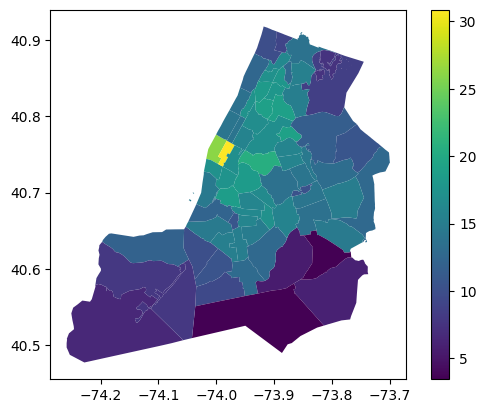

In [13]:
geo_dist_nyc.plot(column="nightlight_avg", cmap="viridis", legend=True)


In [17]:
nyc_df["geometry"] = nyc_df.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)
nyc_gdf = gpd.GeoDataFrame(nyc_df, geometry="geometry", crs="EPSG:4326")

# 4. Применяем VIIRS √ raster к точкам
nyc_gdf["light_sqrt"] = point_query(
    nyc_gdf["geometry"],
    "data/nyc_viirs_sqrt_july2022.tif"
)

# 5. Добавим бинарный признак "светло/темно"
nyc_gdf["bright_flag"] = nyc_gdf["light_sqrt"].apply(lambda x: 1 if x and x > 12 else 0)

In [18]:
nyc_gdf

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,geometry,light_sqrt,bright_flag
0,205590989,11/24/2019,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,28,...,F,WHITE,997571.0,234556.0,40.810476,-73.951880,POINT (-73.95188015099995 40.81047604300005),POINT (-73.95188 40.81048),17.381474,1
1,202546976,09/17/2019,793.0,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,M,6,...,M,BLACK,982746.0,206647.0,40.733883,-74.005428,POINT (-74.00542831099995 40.73388303300004),POINT (-74.00543 40.73388),18.695447,1
2,203563701,10/10/2019,494.0,"STOLEN PROPERTY 2,1,POSSESSION",111.0,POSSESSION OF STOLEN PROPERTY,PL 1654502,F,K,90,...,M,BLACK HISPANIC,1000830.0,197889.0,40.709829,-73.940198,POINT (-73.94019763899996 40.70982902900005),POINT (-73.9402 40.70983),17.921908,1
3,205169609,11/14/2019,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,B,43,...,M,BLACK HISPANIC,1020183.0,239283.0,40.823387,-73.870170,POINT (-73.87017044999999 40.823387291000074),POINT (-73.87017 40.82339),17.314254,1
4,204097687,10/23/2019,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211300,F,Q,114,...,M,BLACK,1007694.0,219657.0,40.769561,-73.915363,POINT (-73.91536344699995 40.769561242000066),POINT (-73.91536 40.76956),17.947465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63952,210237326,02/28/2020,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100B,M,M,6,...,M,BLACK,982531.0,204757.0,40.728695,-74.006204,POINT (-74.00620360899995 40.728695406000035),POINT (-74.0062 40.7287),18.367127,1
63953,212445355,04/28/2020,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,72,...,M,WHITE HISPANIC,980334.0,174808.0,40.646492,-74.014113,POINT (-74.01411298599999 40.646491562000044),POINT (-74.01411 40.64649),19.040635,1
63954,213592090,05/27/2020,705.0,"FORGERY,ETC.-MISD.",358.0,OFFENSES INVOLVING FRAUD,PL 1700500,M,B,46,...,M,BLACK,1009694.0,249366.0,40.851099,-73.908030,POINT (-73.90803040599997 40.85109863400004),POINT (-73.90803 40.8511),17.883293,1
63955,212830424,05/08/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,M,10,...,M,BLACK,984686.0,209908.0,40.742834,-73.998428,POINT (-73.99842802399996 40.74283378800004),POINT (-73.99843 40.74283),23.440137,1


In [ ]:
import pandas as pd
import geopandas as gpd
import leafmap

filtered = nyc_gdf.dropna(subset=["light_sqrt"]).copy()
filtered = filtered.reset_index(drop=True)

filtered["light_class"] = pd.cut(
    filtered["light_sqrt"],
    bins=[0, 1, 2, 3, 4, 5, 10, 20],
    labels=["Very dark", "Dark", "Low", "Medium", "Bright", "Very bright", "Extremely bright"]
)


m = leafmap.Map(center=[40.72, -73.94], zoom=11)

m.add_points_from_xy(
    filtered,
    x="Longitude",
    y="Latitude",
    color_column="light_class",
    layer_name="Crime by Light Class",
    radius=5,
    opacity=0.6,
    tooltip=["OFNS_DESC", "PERP_RACE", "light_sqrt", "light_class"]
)

m


In [9]:
m = leafmap.Map(center=(40, -100), zoom=4)
m.add_gdf(geo_dist_Ch, layer_name="Black Marble")
m.add_layer_control()
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [ ]:
base = '/home/evharthman'
path_data = f"{base}/data"

In [19]:
m = leafmap.Map(center=(40, -100), zoom=4)
satellite = f"data/BlackMarble_2016_C1_geo.tif"
m.add_raster(satellite, layer_name="Huge one")
m.add_layer_control()
m

Map(center=[45.0, 45.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [12]:
m = leafmap.Map(center=(40, -100), zoom=4)
night_light = f"data/BlackMarble_2016_A1_geo.tif"
m.add_raster(night_light, layer_name="Black Marble")
m.add_layer_control()
m

Map(center=[45.0, -135.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

[2025-05-06 14:35:03,672] ERROR in app: Exception on /api/metadata [GET]
Traceback (most recent call last):
  File "c:\Users\eseth\anaconda3\envs\satellite_clean\lib\site-packages\flask\app.py", line 917, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\eseth\anaconda3\envs\satellite_clean\lib\site-packages\flask\app.py", line 902, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
  File "c:\Users\eseth\anaconda3\envs\satellite_clean\lib\site-packages\flask_restx\api.py", line 402, in wrapper
    resp = resource(*args, **kwargs)
  File "c:\Users\eseth\anaconda3\envs\satellite_clean\lib\site-packages\flask\views.py", line 110, in view
    return current_app.ensure_sync(self.dispatch_request)(**kwargs)  # type: ignore[no-any-return]
  File "c:\Users\eseth\anaconda3\envs\satellite_clean\lib\site-packages\flask_restx\resource.py", line 41, in dispatch_request
    resp = meth(*args, **kwa

In [ ]:
m = leafmap.Map(center=(40, -100), zoom=4)
night_light = f"data/BlackMarble_2016_C2_geo.tif"
m.add_raster(night_light, layer_name="Black Marble")
m.add_layer_control()
m

In [20]:
m = leafmap.Map(center=(40, -100), zoom=4)
night_light = f"data/city_lights_namerica_8k.tif"
m.add_raster(night_light, layer_name="Black")
m.add_layer_control()
m

HTTPError: 500 Server Error: INTERNAL SERVER ERROR for url: http://localhost:63684/api/metadata?&filename=c%3A%5CUsers%5Ceseth%5CDesktop%5Csatellite_pro%5Cdata%5Ccity_lights_namerica_8k.tif

In [ ]:
print(df['Lon_Lat'].head(10))


In [ ]:
def safe_wkt_loads(x):
    if isinstance(x, str):
        return wkt.loads(x)
    else:
        return None
df['geometry'] = df['Lon_Lat'].apply(safe_wkt_loads)

gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf = gdf.dropna(subset=['geometry'])
gdf.set_crs(epsg=4326, inplace=True)

gdf.plot(markersize=5, color='blue', alpha=0.5)
print(gdf.head())

In [ ]:
gdf.to_file("Geodata.geojson", driver="GeoJSON")
